In [1]:
# Diese Zeile importiert sogenannte Packages, die es uns erlauben auf von anderen geschriebenen Code zuzugreifen
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Notebook für die Übung Medizininformatik

Dieses Notebook soll einen ersten Einblick in die Arbeit mit Daten und Machine Learning in der Medizin geben. Es besteht keineswegs der Anspruch, dass Sie den Code vollständig verstehen, geschweige denn reproduzieren können. Stattdessen sollen Sie ein Gefühl dafür bekommen, wie Daten in Python gehandhabt werden und wie das Trainieren eines Machine-Learning-Modells aussieht.

### AUFGABE:
Führen Sie den Code Zeile für Zeile aus. Eine bereits ausgeführte Zeile kann den Datensatz verändern und in darauffolgenden Zeilen zu Fehlern führen. Sollte dies bei Ihnen vorkommen, können Sie über „Restart Kernel“ neu starten. Allerdings muss aufgrund diese Abhängigkeiten dann von der ersten Zeile aus alles wieder ausgeführt werden. Sie finden in diesem Notebook Fragen und gelb markierte ToDos, die Sie bitte bearbeiten.

### HINWEIS:
Wir geben einige Informationen zum medizinischen Kontext dieser Aufgabe, allerdings ist dies nicht der Fokus dieser Veranstaltung (oder von uns Lehrenden). Außerdem ist heute nur sehr begrenzt Zeit, weshalb wir Sie bitten, sich hier nicht zu lange mit den medizinischen Aspekten dieses Use Cases aufzuhalten, sondern sich auf die technischen Details zu konzentrieren.
Falls nichts mehr geht, einfach das Notebook schließen und über den Link neu öffnen. Dann sind allerdings alle Änderungen verloren.

## Schritt 0: Hintergrund & Zieldefinition

Dieser Datensatz stammt aus dem Paper:
Davide Chicco, Giuseppe Jurman: Machine learning can predict survival of patients with heart failure from serum creatinine and ejection fraction alone. BMC Medical Informatics and Decision Making 20, 16 (2020).

Herz-Kreislauf-Erkrankungen sind weltweit die Todesursache Nr. 1. Menschen, die an einer Herz-Kreislauf-Erkrankung leiden oder ein hohes kardiovaskuläres Risiko aufweisen, müssen frühzeitig erkannt und behandelt werden. Unser Datensatz enthält 274 Patient:innen (jeweils eine Reihe) mit jeweils 12 Merkmalen (Spalten) aus dem Faisalabad Institute of Cardiology am Allied Hospital in Faisalabad (Punjab, Pakistan) von April bis Dezember 2015.

Die letzte Spalte (DEATH_EVENT) zeigt an, ob die Person bis zum Follow-up zwischen 4 und 285 Tagen (Durchschnitt 130 Tage) nach Aufnahme der Werte verstorben ist. Des Weiteren haben wir die folgenden Informationen:

### Binäre Features (0 oder 1):
- Sex: 0 ist Mann, 1 ist Frau
- High blood pressure: Unveröffentlichtes Kriterium für Bluthochdruck; 1 = ja, 0 = nein
- Anaemia: Hämatokritwert <36 % = 1, sonst 0
- Diabetes-Diagnose: 1 = ja, 0 = nein
- Smoking: 1 = Raucher, 0 = Nichtraucher

### Numerische Features:

- Age: Alter in Jahren
- Creatinine phosphokinase in mcg/L
- Ejection fraction in %
- Platelets in Kiloplatelets/mL
- Serum creatinine in mg/dL
- Serum sodium in mEq/L


Ziel ist es, anhand der vorhandenen Features vorherzusagen, welche Patient:innen vor dem Follow-up versterben (DEATH_EVENT).

## Schritt 1: Daten (Ein-)Sammeln

Der folgende Code läd einen ausgewählten Teil dieses Datensatzes in unsere Entwicklungsumgebung.

In [2]:
# Datensatz laden
# Wir benennen den Datensatz mit "df" (steht für DataFrame) und nutzen aus dem Pandas (pd) Package die "read_csv" Methode um die csv Datei einzulesen.
# Jetzt können wir mit "df" auf unseren Datensatz zugreifen
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")

# durch .describe() werden die Namen und deskriptiven Statistiken pro Spalte für unser df angezeigt
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
count,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000
mean,67.542580,0.408759,588.237226,0.423358,38.445255,0.350365,262696.995109,1.355876,136.726277,0.675182,0.324818,0.259124
std,116.864789,0.492504,983.011296,0.494995,11.579899,0.477957,95917.605698,1.002654,4.333391,0.469164,0.469164,0.438956
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.500000,113.000000,0.000000,0.000000,0.000000
25%,50.000000,0.000000,115.750000,0.000000,30.000000,0.000000,215250.000000,0.900000,134.000000,0.000000,0.000000,0.000000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,261000.000000,1.100000,137.000000,1.000000,0.000000,0.000000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,302000.000000,1.300000,140.000000,1.000000,1.000000,1.000000
max,1985.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.400000,148.000000,1.000000,1.000000,1.000000


## Schritt 2: Daten Exploration
Welche Visualiserung könnte spannend sein?

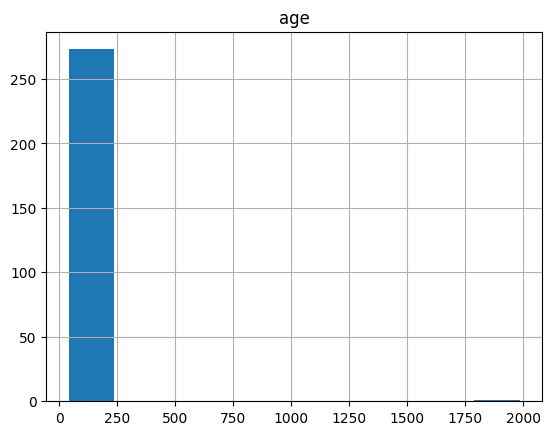

In [3]:
# Todo: Schauen Sie sich die Histogramme an und ersetzen Sie den Spaltennamen hinter column durch andere numerische Variablen, für die ein Histogramm spannend sein könnte.
# Hinweis: Bei Python müssen Texte immer in "" angegeben werden. Ohne "" handelt es sich um den Namen einer Variablen oder Ähnliches. Schreiben Sie die Antwort also zum Beispiel als "age" und nicht age.

column = "age"
# Histogram Einzelne Variable
df.hist(column)
plt.show()

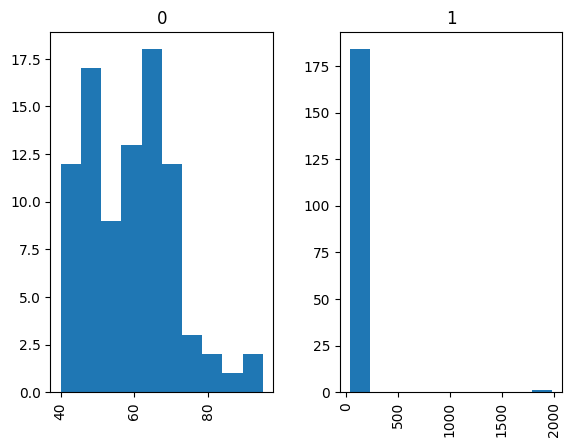

In [7]:
# Todo: Schauen Sie sich die Histogramme an und ersetzen Sie den Wert von cat_variable durch andere kategorische Variablen, die die Daten in Gruppen teilen, die für die numerische Variable spannend sein könnten.
# Histogramm einer Variable (numerisch), nach Gruppen aufgeteilt. Für die cat_variable ergeben nur binäre Variablen Sinn (s. oben).

cat_variable = 'sex'
df.hist(column, by=cat_variable)
plt.show()

## Schritt 3: Data Cleaning

Der Maximalwert in der Spalte „age“ beträgt 1985, aber ein Patient im Alter von 1985 Jahren ist natürlich eher unrealistisch. Ersetzen Sie die Zahl hinter „korrekter_wert =“ mit dem besten Vorschlag, wie alt dieser Patient sein könnte.

In [6]:
#Todo: Ersetzen Sie diesen Wert für die beste Idee, welches Alter dieser Patient hat
korrekter_wert = 1985

# Diese Code schaut, wo in unserem DataFrame (df) in der Spalte "age" der Wert 1985 ist
# Für Felder mit dem Wert 1985 ersetzt er diesen Wert mit dem, was wir in korrekter_wert angeben.
# Für alle anderen Werte behält er was vorher in der Spalt "age" stand.
# Diesen Code nicht ändern, sondern nur die Zahl oben löschen.

df.age = np.where(df.age==1985, korrekter_wert, df.age)
df.age.max()

np.float64(1985.0)

## Schritt 4: Feature Engineering
An dieser Stelle kann man sich überlegen, wie man die Daten noch verbessern kann, um das Verhältnis von wichtigen Informationen zu unwichtigen Informationen zu erhöhen. Dieser Datensatz ist schon recht kompakt und die Zeit heute begrenzt, weshalb wir diesen Schritt überspringen.

Beispiele, bei denen bereits Feature Engineering betrieben wurde, sind der binäre Indikator für Bluthochdruck, da die absoluten Werte bereits interpretiert wurden.

Ein weiteres, hier nicht zutreffendes Beispiel für Feature Engineering wäre, aus Gewicht und Größe den BMI zu berechnen, da bspw. 95 kg bei 1.60 Körpergröße ist im Sinne eines Risikofaktors anders zu bewerten als bei 1.95 m Körpergröße
.

## Schritt 5: Machine Learning

Jetzt gehen wir zum Machine-Learning-Teil über. Wir importieren ein logistisches Regressionsmodell, das uns eine Vorhersage für das Todesevent (1 oder 0) liefern kann.

In [8]:
# Wir importieren die benötigten Packages und Modelle
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Wir laden das Modell und benennen es in "lr" um
lr = LogisticRegression(solver='liblinear', random_state=42)

# Unsere X-Features sind alle Werte, die wir zur Vorhersage nutzen wollen. Wir können auch weniger verwenden.
X = df[['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking']]

# Unser y-Wert ist das, was wir vorhersagen wollen
y = df['DEATH_EVENT']

# Wir teilen unsere Daten in 80 % Trainings- und 20 % Testdaten
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [9]:
# Beim "fit" berechnet das Modell, welche Funktion sich am besten an die Trainingsdaten anpasst

lr.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

accuracy ist 0.782608695652174


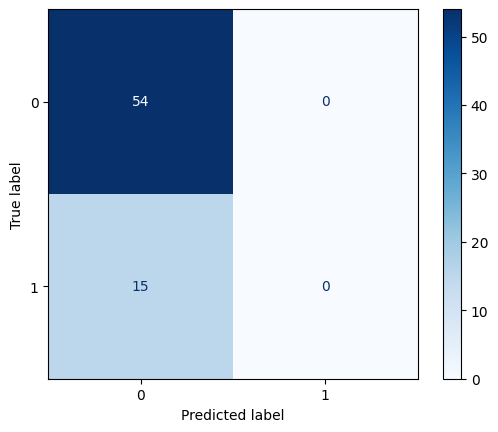

In [12]:
# TODO: Ist das ein gutes Vorhersagemodell?
# Jetzt können wir schauen, wie gut das Modell auf den Testdaten performed. Dafür berechnen wir die Accuracy (True Positives + True Negatives) / (#Reihen) und plotten die Confusion Matrix.

print('accuracy ist',lr.score(X_test, y_test))

# Hier laden wir das Package, um uns die Confusion Matrix anzeigen zu lassen
from sklearn.metrics import ConfusionMatrixDisplay

# Wir geben unser trainiertes Modell "lr" sowie unsere Test-Features (X_test) und die korrekten y-Werte (y_test) ein,
# um zu prüfen, wie unser Modell auf neuen, bislang ungesehenen Patient:innen performt hätte.
ConfusionMatrixDisplay.from_estimator(lr, X_test, y_test, cmap='Blues')